# **Hand Tracking (El Takibi)**

Hand Tracking işlemi iki ana bölümden meydana gelir. Bunlar:

*    Palm Detector

*    Hand Landmarks

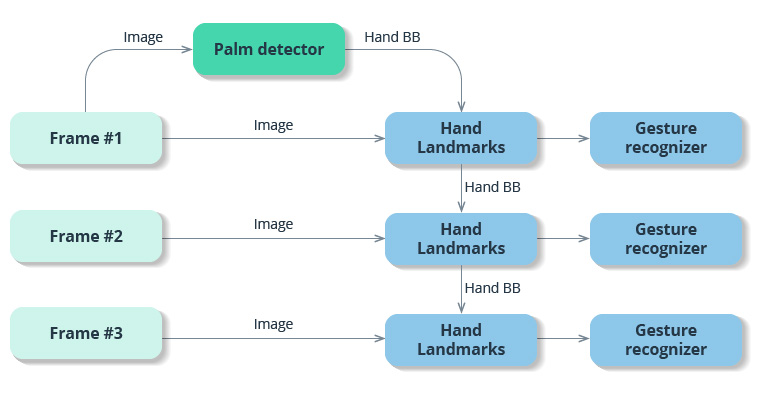

Öncelikle Palm Detector ile el tespit edilir ve Hand Bounding Box oluşur.

Hand Bounding Box ile videodan gelen framelerle elin eklem yerleri işaretlenir.

Hand Landmarks ile işaretlenen yerlerin (21 farklı eklem) x,y,z koordinatlarının çıkartılmasıdır.

Her bir parmakta 4 eklem bulunur, bilek de eklendiğinde elde toplam 21 eklem bulunmaktadır.

In [ ]:
import cv2
import time #time kütüphanesi ile fps (frame per second) hesaplanacaktır.
import mediapipe as mp

In [ ]:
capture = cv2.VideoCapture(0)

VideoCapture methodunun içerisinde yer alan parametre dahili ya da harici kameraları belirlemek için kullanılır.

Bilgisayarın kamerasını kullanmak için 0, harici kamerayı kullanmak için 1 kullanılır.

In [ ]:
media_pipe_Hand = mp.solutions.hands

Hand detection modülüne gidilerek media_pipe_Hand objesi yaratılmıştır.

In [ ]:
hands = media_pipe_Hand.Hands(max_num_hands = 2)

max_num_hands parametresi algoritmanın hızını etkiler.

Çünkü tespit işlemi gerçekleşmeden tracking işlemi gerçekleşemeyeceği için el sayısı arttıkça algoritmanın hızı yavaşlar. 

In [ ]:
media_pipe_draw = mp.solutions.drawing_utils

media pipe kütüphanesinin çizim altyapısı media_pipe_draw değişkenine aktarılır.

In [ ]:
ptime = 0
ctime = 0

In [ ]:
#video read
while True:
    ret,frame = capture.read()
    
    #converting bgr to rgb format
    imgRGB = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    
    result = hands.process(imgRGB) #mediapipe'ta görüntü işlenir.
    #print(result.multi_hand_landmarks)
    #result, kamerada el göründüğünde, eklemlerin x,y,z koordinatlarını gösterir.
    
    if result.multi_hand_landmarks:
        
        for handLms in result.multi_hand_landmarks:
            media_pipe_draw.draw_landmarks(frame, handLms, media_pipe_Hand.HAND_CONNECTIONS) 
            #her bir frame'de elin her bir eklemi işaretlenir.
            
            for id, lm in enumerate(handLms.landmark):
                #x,y,z koordinatları lm içerisine aktarılır.
                #x,y,z koordinatlarının hangi ekleme ait olduğu id içerisinde depolanır.
                #print(id,lm)
                
                height, weight, color = frame.shape
                cx, cy = int(lm.x*weight), int(lm.y*height)
                
                #wrist (bilek)
                #bileğin id'si 0'dır.
                if id == 0:
                    cv2.circle(frame, (cx,cy), 9, (255,0,0), cv2.FILLED)
                    #9 circle'ın boyutu, (255,0,0) rengidir.
                    #FILLED parametresi ile içi doldurulur.
                    
    #fps (frame per second)
    ctime = time.time()
    fps = 1 / (ctime - ptime)
    ptime = ctime
    
    cv2.putText(frame,"FPS: "+str(int(fps)), (10,75), cv2.FONT_HERSHEY_PLAIN, 3, (255,0,0), 5)
    
    cv2.imshow("Hand Tracking",frame)
            
    if cv2.waitKey(1) & 0xFF == ord("q"): break

capture.release()